# Strartup Crunchbase Dataset

# Importing the libraries

In [189]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
%matplotlib inline


# Data Loading 

In [190]:
data = pd.read_csv("investments_VC.csv",encoding = 'unicode_escape', engine ='python')
data

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning

In [191]:
# To remove the empty spaces in the start and end of column names for easier future access
data.columns = data.columns.str.strip()

In [192]:
# To view the columns to get understanding of the dataset
data.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'market',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

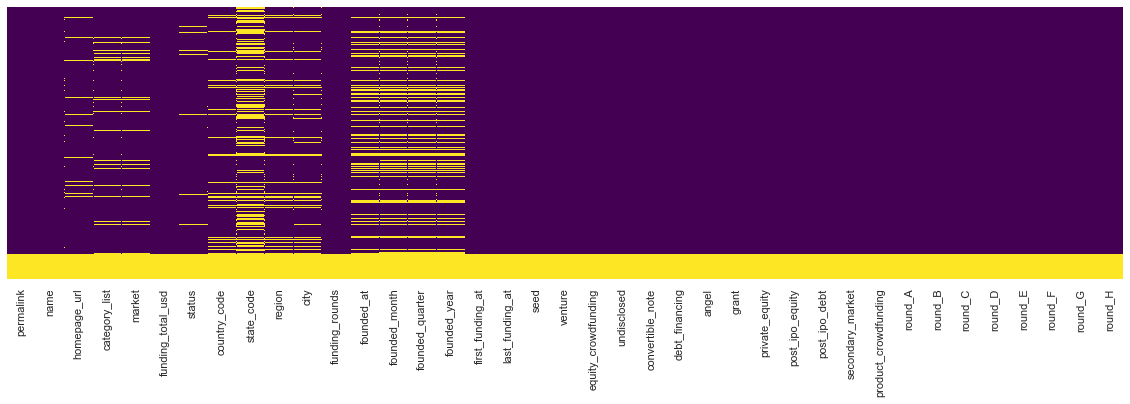

In [193]:
#looking for missing values
fig,axes = plt.subplots(1,1,figsize=(20,5))
sns.heatmap(data.isna(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()
#data.head()

In [194]:
# Count to see if is equally distributed
data['status'].value_counts()

operating    41829
acquired      3692
closed        2603
Name: status, dtype: int64

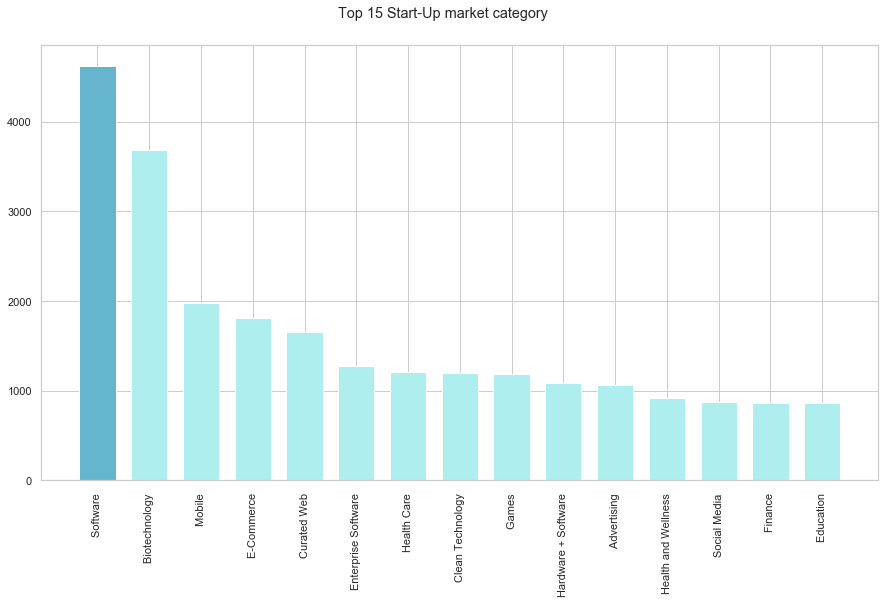

In [195]:
#Top 15 startup categories
plt.rcParams['figure.figsize'] = 15,8

height = data['market'].value_counts()[:15].tolist()
bars =  data['market'].value_counts()[:15].index.tolist()
y_pos = np.arange(len(bars))
plt.bar(y_pos, height , width=0.7 ,color= ['c']+['paleturquoise']*14)
plt.xticks(y_pos, bars)
plt.xticks(rotation=90)
plt.title("Top 15 Start-Up market category", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.show()

In [196]:
# Converting to integers 

In [197]:
#Cleaning of status
#data.replace("",inplace = "True")
data.dropna(how = "all",inplace = True)
data = data[data['status'].notna()]
#data.dropna(subset = ['status'])
dependent = data.status.unique()
GenresDict = {}
for i in range(len(dependent)):
    GenresDict[dependent[i]] = i
data['Status'] = data['status'].map(GenresDict).astype(int)
data.head(20)

/Users/mansiudani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,Status
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6,/organization/fox-networks,.Fox Networks,http://www.dotfox.com,|Advertising|,Advertising,"49,12,393",closed,ARG,NaN,Buenos Aires,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
7,/organization/0-6-com,0-6.com,http://www.0-6.com,|Curated Web|,Curated Web,"20,00,000",operating,NaN,NaN,NaN,...,0.0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,|Software|,Software,-,operating,USA,IL,"Springfield, Illinois",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9,/organization/01games-technology,01Games Technology,http://www.01games.hk/,|Games|,Games,"41,250",operating,HKG,NaN,Hong Kong,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
10,/organization/1-2-3-listo,"1,2,3 Listo",http://www.123listo.com,|E-Commerce|,E-Commerce,"40,000",operating,CHL,NaN,Santiago,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [198]:
#data.dropna(how = 'all',inplace = True)
data.drop(['permalink', 'name', 'homepage_url', 'category_list', 'market','country_code', 'state_code', 'region','city'],axis=1,inplace = True)
data.shape

(48124, 31)

In [199]:
#df = pd.concat([df,pd.get_dummies(df['country'], prefix='country')],axis=1)

In [200]:
#Correlation matrix
pearsoncorr = data.corr(method='pearson')
pearsoncorr

,funding_rounds,founded_year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,...,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,Status
funding_rounds,1.000000,-0.060837,0.085790,0.402993,-0.002349,0.033747,0.016489,0.020613,0.059196,0.013570,...,0.015683,0.166888,0.278541,0.299525,0.201437,0.204933,0.105611,0.060265,0.035512,-0.082033
founded_year,-0.060837,1.000000,0.076438,-0.092247,0.006206,-0.036179,-0.009361,-0.025587,0.017584,-0.086300,...,-0.001280,-0.018296,-0.042289,-0.046740,-0.029299,-0.028128,-0.009727,-0.003277,-0.000692,0.101874
seed,0.085790,0.076438,1.000000,-0.011464,-0.003866,-0.004375,-0.001592,-0.002323,-0.002823,-0.004976,...,0.204214,0.014330,0.001726,-0.000945,-0.007874,-0.010746,-0.005341,-0.002066,-0.001089,-0.002780
venture,0.402993,-0.092247,-0.011464,1.000000,-0.007360,0.009295,0.000782,0.008721,0.005388,0.007853,...,-0.003088,0.325413,0.494678,0.575320,0.589140,0.529523,0.428668,0.419804,0.374429,-0.058636
equity_crowdfunding,-0.002349,0.006206,-0.003866,-0.007360,1.000000,-0.001325,-0.000252,-0.000414,0.018906,-0.000883,...,0.008586,-0.003780,-0.005932,-0.004700,-0.002345,-0.001976,-0.000846,-0.000344,-0.000164,-0.000589
undisclosed,0.033747,-0.036179,-0.004375,0.009295,-0.001325,1.000000,-0.000662,-0.000325,0.004280,-0.001095,...,-0.000695,0.004812,-0.000828,0.004152,0.000809,0.028180,-0.000790,-0.000383,-0.000228,-0.006589
convertible_note,0.016489,-0.009361,-0.001592,0.000782,-0.000252,-0.000662,1.000000,0.000982,-0.000699,-0.000375,...,-0.000205,-0.001900,0.000238,0.001537,0.000486,0.000034,-0.000356,-0.000089,-0.000086,0.001122
debt_financing,0.020613,-0.025587,-0.002323,0.008721,-0.000414,-0.000325,0.000982,1.000000,-0.001126,-0.000299,...,-0.000224,-0.000379,0.007156,0.008458,0.003753,0.006833,0.005467,0.000144,-0.000007,-0.001366
angel,0.059196,0.017584,-0.002823,0.005388,0.018906,0.004280,-0.000699,-0.001126,1.000000,-0.002548,...,-0.001293,0.016915,0.003115,0.004856,0.013801,-0.000770,-0.001913,-0.000284,0.000426,0.001399
grant,0.013570,-0.086300,-0.004976,0.007853,-0.000883,-0.001095,-0.000375,-0.000299,-0.002548,1.000000,...,0.000744,0.000498,0.002249,0.008792,0.004158,0.011127,-0.000448,-0.000320,-0.000152,0.002385


In [201]:
# -- Converting the -'s in funding column to 0's
data.funding_total_usd = data.funding_total_usd.replace('-','0')

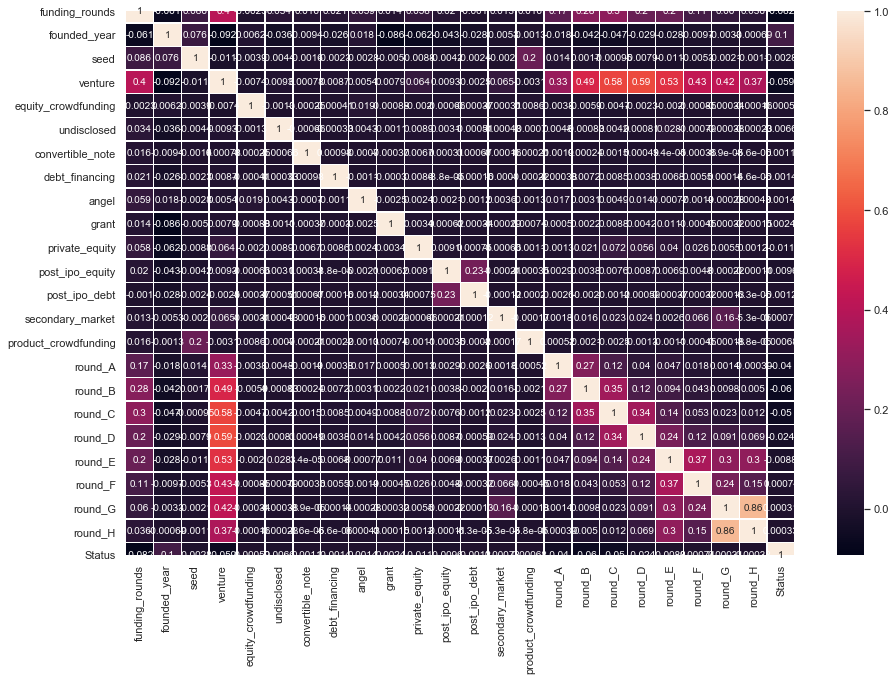

In [202]:
plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, linewidth=0.5);

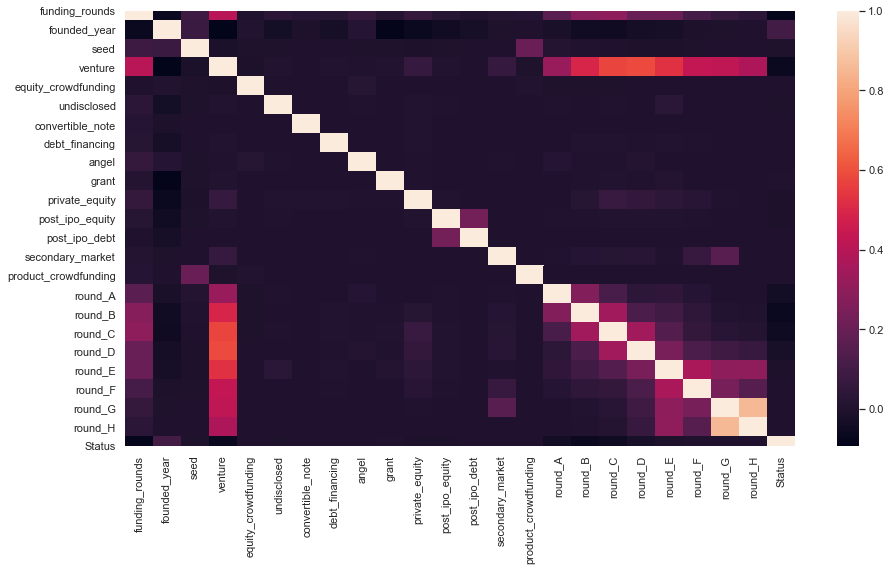

In [203]:
sns.heatmap(data.corr())
plt.show()


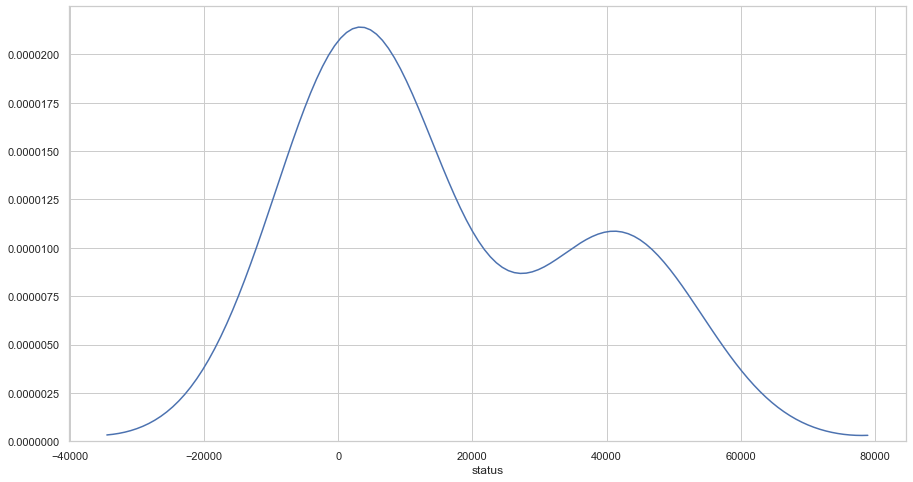

In [204]:
sns.distplot(data['status'].value_counts(),hist=False)

In [205]:
# 'funding_total_usd' column : this column is the sum of all fundings collected from one or more channels
# However, most of the values are string type and needs to be numeric (float)
data['funding_total_usd'].apply(type).value_counts()

<class 'str'>    48124
Name: funding_total_usd, dtype: int64

In [206]:
#let's create a new column named 'total_funding' and fill it with the sum all the fundings collected

funding_channels=['seed','venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note','debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity', 'post_ipo_debt', 'secondary_market', 'product_crowdfunding']

data['total_funding']=0
for c in funding_channels:
    data['total_funding']=data['total_funding']+data[c]

data[['funding_total_usd','total_funding']].head()

/Users/mansiudani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/mansiudani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,funding_total_usd,total_funding
0,"17,50,000",1750000.0
1,"40,00,000",4000000.0
2,"40,000",40000.0
3,"15,00,000",1500000.0
4,"60,000",60000.0


In [207]:
data.drop(funding_channels, axis = 1)


,funding_total_usd,status,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,Status,total_funding
0,"17,50,000",acquired,1.0,2012-06-01,2012-06,2012-Q2,2012.0,2012-06-30,2012-06-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1750000.0
1,"40,00,000",operating,2.0,NaN,NaN,NaN,NaN,2010-06-04,2010-09-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4000000.0
2,"40,000",operating,1.0,2012-10-26,2012-10,2012-Q4,2012.0,2012-08-09,2012-08-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,40000.0
3,"15,00,000",operating,1.0,2011-04-01,2011-04,2011-Q2,2011.0,2011-04-01,2011-04-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1500000.0
4,"60,000",operating,2.0,2014-01-01,2014-01,2014-Q1,2014.0,2014-08-17,2014-09-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,60000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49433,"3,20,000",operating,1.0,2013-01-28,2013-01,2013-Q1,2013.0,2014-03-24,2014-03-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,320000.0
49434,"15,87,301",operating,1.0,NaN,NaN,NaN,NaN,2012-04-01,2012-04-01,1587301.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1587301.0
49435,"97,398",operating,5.0,2012-05-13,2012-05,2012-Q2,2012.0,2011-11-01,2014-09-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,97398.0
49436,"93,00,000",operating,1.0,NaN,NaN,NaN,NaN,2011-11-21,2011-11-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,9300000.0


In [208]:
# Irrevant rows are dropped
data = data.drop(['funding_total_usd', 'founded_at', 'founded_month','founded_quarter','first_funding_at','last_funding_at'],axis = 1)

In [209]:
#Rows that added to make a new variable are dropped
data = data.drop(['seed','venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note','debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity', 'post_ipo_debt', 'secondary_market', 'product_crowdfunding'], axis = 1)

In [210]:
data.head()

,status,funding_rounds,founded_year,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,Status,total_funding
0,acquired,1.0,2012.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1750000.0
1,operating,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4000000.0
2,operating,1.0,2012.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,40000.0
3,operating,1.0,2011.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1500000.0
4,operating,2.0,2014.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,60000.0


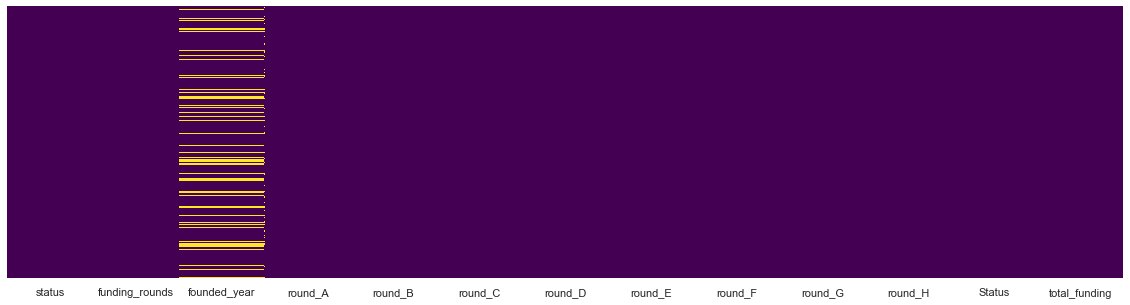

In [211]:
#After removing missing values
fig,axes = plt.subplots(1,1,figsize=(20,5))
sns.heatmap(data.isna(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [212]:
data.dropna(how = 'all',inplace = True)

In [213]:
import warnings

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, log_loss
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import metrics

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
data = data.dropna()


In [214]:
#to add into results_index for evaluation of error term 
def Evaluationmatrix_dict(y_true, y_predict, name = 'Linear - Integer'):
    dict_matrix = {}
    dict_matrix['Series Name'] = name
    dict_matrix['Mean Squared Error'] = metrics.mean_squared_error(y_true,y_predict)
    dict_matrix['Mean Absolute Error'] = metrics.mean_absolute_error(y_true,y_predict)
    #dict_matrix['Mean Squared Log Error'] = metrics.mean_squared_log_error(y_true,y_predict)
    return dict_matrix

In [215]:
#for evaluation of error term and 
def Evaluationmatrix(y_true, y_predict):
    print ('Mean Squared Error: '+ str(metrics.mean_squared_error(y_true,y_predict)))
    print ('Mean absolute Error: '+ str(metrics.mean_absolute_error(y_true,y_predict)))
    #print ('Mean squared Log Error: '+ str(metrics.mean_squared_log_error(y_true,y_predict)))

In [216]:
from sklearn.linear_model import LinearRegression 

#Integer encoding

X = data.drop(labels = ['status','Status'],axis = 1)
y = data.Status
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
model = LinearRegression()
model.fit(X_train,y_train)
Results = model.predict(X_test)

#Creation of results dataframe and addition of first entry
resultsdf = pd.DataFrame()
resultsdf
resultsdf = resultsdf.from_dict(Evaluationmatrix_dict(y_test,Results),orient = 'index')
resultsdf = resultsdf.transpose()
resultsdf


,Series Name,Mean Squared Error,Mean Absolute Error
0,Linear - Integer,0.125415,0.155068


In [217]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [218]:
#SVM regressor
svc_r=SVC(kernel='rbf')
svc_r.fit(X_train,y_train)
svr_pred=svc_r.predict(X_test)
svr_cm=confusion_matrix(y_test,svr_pred)
svr_ac=accuracy_score(y_test, svr_pred)

/Users/mansiudani/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM_accuracy: 0.8698314108251997


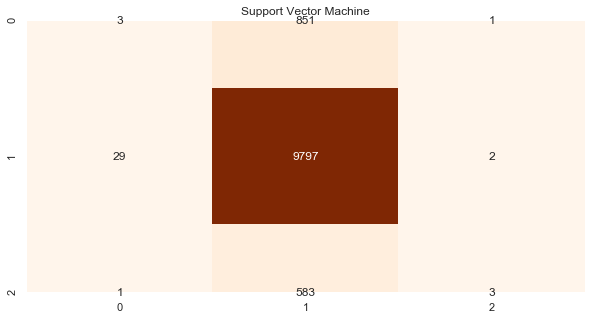

In [219]:
plt.figure(figsize=(10,5))
plt.title("Support Vector Machine")
sns.heatmap(svr_cm,annot=True,cmap="Oranges",fmt="d",cbar=False)
print('SVM_accuracy:',svr_ac)

In [220]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [221]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [222]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [223]:
y_pred = classifier.predict(X_test)

#Naive Bayes


In [224]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)
nb_ac=accuracy_score(y_test, y_pred)

In [225]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.08082206367798957


Naive Bayes accuracy: 0.08082206367798957


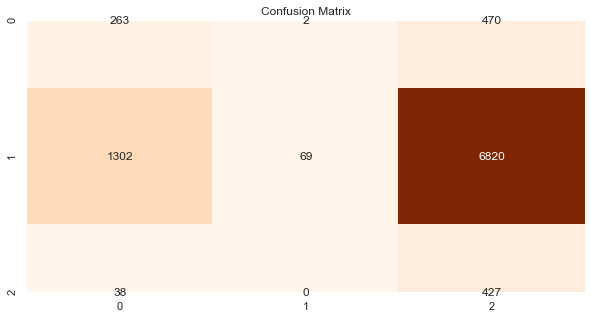

In [226]:
plt.figure(figsize=(10,5))
nb_cm=confusion_matrix(y_test,y_pred)
plt.title("Confusion Matrix")
sns.heatmap(nb_cm,annot=True,cmap="Oranges",fmt="d",cbar=False)
print('Naive Bayes accuracy:',nb_ac)

In [227]:

cm1 = confusion_matrix(y_test, y_pred)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[ 263    2  470]
 [1302   69 6820]
 [  38    0  427]]
Accuracy :  0.03535299755084655
Sensitivity :  0.9924528301886792
Specificity :  0.05032822757111598
